In [3]:
import cv2
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

DIRECTORY = r"G:\Experiment\Face Mask Detection\Face-Mask-Detection-Alert-System-main\Face Mask\Dataset"
CATEGORIES = ["with_mask", "without_mask"]

img_rows, img_cols = 112, 112

images = []
labels = []

for category in CATEGORIES:
    folder_path = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)
        img=cv2.imread(img_path)

        try:
            #Coverting the image into gray scale
            grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

            #resizing the gray scaled image into size 112x112 in order to keep size of the images consistent           
            resized_img=cv2.resize(grayscale_img,(img_rows, img_cols))
            images.append(resized_img)
            labels.append(category)
        # Exception Handling in case any error occurs
        except Exception as e:
            print('Exception:',e)
        
images=np.array(images)/255.0
images=np.reshape(images,(images.shape[0],img_rows, img_cols,1))


# Perform one hot encoding on the labels since the label are in textual form
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_X, test_X, train_y, test_y) = train_test_split(images, labels, test_size=0.25, 
                                                      random_state=0)


In [11]:
# Import Necessary Keras Libraries
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

# Define model paramters
num_classes = 2
batch_size = 32

# Build CNN model using Sequential API
model=Sequential()

#First layer group containing Convolution, Relu and MaxPooling layers
model.add(Conv2D(64,(3,3),input_shape=(img_rows, img_cols, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second layer group containing Convolution, Relu and MaxPooling layers
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten and Dropout Layer to stack the output convolutions above as well as cater overfitting
model.add(Flatten())
model.add(Dropout(0.5))

# Softmax Classifier
model.add(Dense(64,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 64)      640       
_________________________________________________________________
activation (Activation)      (None, 110, 110, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 53, 53, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 86528)             0

In [12]:
## Train the Model

from tensorflow.keras.optimizers import Adam
epochs = 50


adam=Adam(learning_rate = 0.001) 
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

fitted_model = model.fit(
    train_X,
    train_y,
    epochs = epochs,
    validation_split=0.25)



Epoch 1/50
68/68 [==============================] - 68s 711ms/step - loss: 0.6581 - accuracy: 0.6422 - val_loss: 0.1777 - val_accuracy: 0.9469
Epoch 2/50
68/68 [==============================] - 49s 723ms/step - loss: 0.1806 - accuracy: 0.9387 - val_loss: 0.1988 - val_accuracy: 0.9288
Epoch 3/50
68/68 [==============================] - 49s 725ms/step - loss: 0.1463 - accuracy: 0.9457 - val_loss: 0.2098 - val_accuracy: 0.9288
Epoch 4/50
68/68 [==============================] - 38s 561ms/step - loss: 0.1043 - accuracy: 0.9641 - val_loss: 1.0873 - val_accuracy: 0.7095
Epoch 5/50
68/68 [==============================] - 37s 543ms/step - loss: 0.2045 - accuracy: 0.9216 - val_loss: 0.1084 - val_accuracy: 0.9693
Epoch 6/50
68/68 [==============================] - 37s 548ms/step - loss: 0.0442 - accuracy: 0.9897 - val_loss: 0.1397 - val_accuracy: 0.9553
Epoch 7/50
68/68 [==============================] - 46s 675ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 0.1115 - val_accuracy: 0.9651

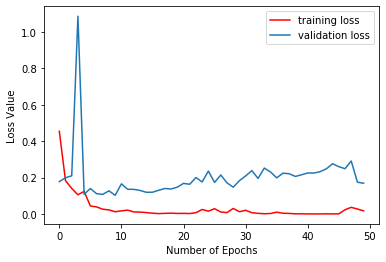

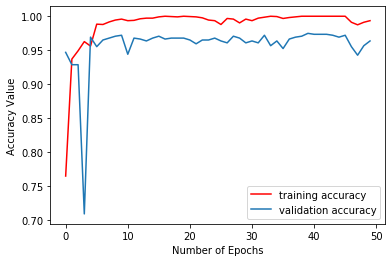

In [13]:
## Plot the Training Loss & Accuracy

from matplotlib import pyplot as plt
# Plot Training and Validation Loss
plt.plot(fitted_model.history['loss'],'r',label='training loss')
plt.plot(fitted_model.history['val_loss'],label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

# Plot Training and Validation Accuracy
plt.plot(fitted_model.history['accuracy'],'r',label='training accuracy')
plt.plot(fitted_model.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()


In [15]:
# Save or Serialize the model with the name face_mask_detection_alert_system
model.save('face_mask_detection_alert_system1.h5')
